In [2]:
# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances
# with 14 features, including age, sex, chest pain type,resting blood pressure, serum cholesterol, and maximum heart rate achieved.
# Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

#Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

import pandas as pd
df=pd.read_csv('heart_disease.csv')

x=df.drop(labels='target',axis=1)
y=df.target

In [3]:
#Q2. Split the dataset into a training set (70%) and a test set (30%).

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [4]:
#Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other 
#    hyperparameters.

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=100,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [5]:
#Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score

y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Accuracy: ",classification_report(y_test,y_pred))

Accuracy:  0.8131868131868132
Accuracy:                precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



Top 5 Features

Feature:  ca  Score: 13.85  %
Feature:  thal  Score: 13.45  %
Feature:  oldpeak  Score: 11.53  %
Feature:  thalach  Score: 11.38  %
Feature:  cp  Score: 9.7  %


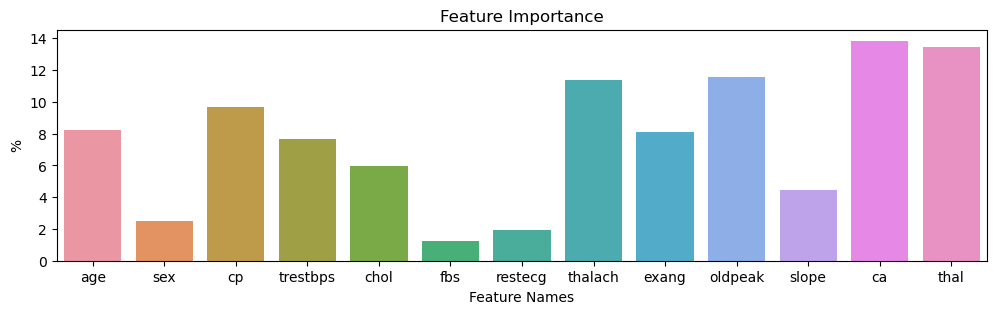

In [6]:
#Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature 
#    importances using a bar chart.

feature_imp=classifier.feature_importances_

feature_scores = dict(zip(x.columns, feature_imp))

sorted_features = sorted(feature_scores.items(),key=lambda x:x[1],reverse=True)

top_5=sorted_features[:5]

print("Top 5 Features")
print()
for i,j in top_5:
    print('Feature: ',i,' Score:',round(j*100,2),' %')
    
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,3))
plt.title("Feature Importance")
plt.xlabel('Feature Names')
plt.ylabel('%')
sns.barplot(x=x.columns,y=feature_imp*100,)
plt.show()

In [7]:
feature_scores.keys()

dict_keys(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [8]:
#Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum
#    depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

from sklearn.model_selection import RandomizedSearchCV

param_space = { 'n_estimators': [100, 200, 300, 400, 500],
                'max_depth': [None, 5, 10, 15, 20],
                'min_samples_split': [2, 4, 6, 8, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5]   }

estim=RandomForestClassifier()
cv = RandomizedSearchCV(estimator=estim,
                        param_distributions=param_space,
                        n_iter=10,  # Set the number of iterations for random sampling
                        cv=5,       # 5-fold cross-validation
                        scoring='accuracy',  
                        random_state=42)
cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy')

In [9]:
#Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model
#    with the default model.

print("Best Hyperparameters: ", cv.best_params_)
print("Best Hyperparameter Accuracy: ", cv.best_score_*100,'%')

print("Accuracy of default model: ",accuracy_score(y_test,y_pred)*100,'%')

Best Hyperparameters:  {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 5}
Best Hyperparameter Accuracy:  83.9202657807309 %
Accuracy of default model:  81.31868131868131 %


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


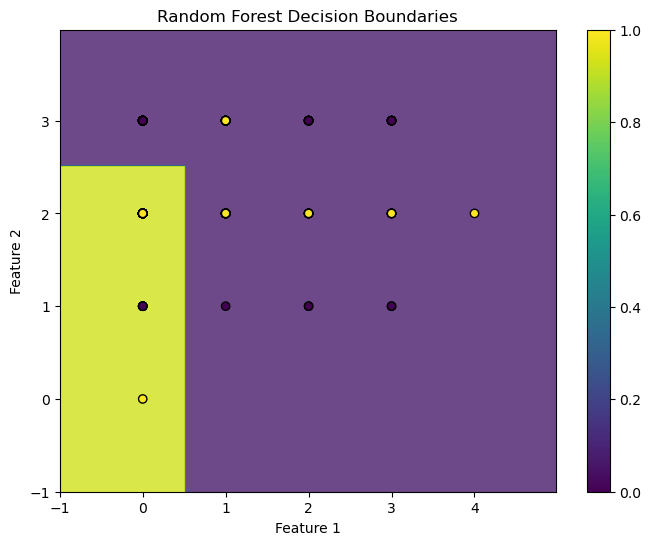

In [12]:
#Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two 
#    of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

x_selected=x_train[list(dict(sorted_features[:2]).keys())]
import numpy as np
x1_min, x1_max = x_selected.iloc[:,0].min() - 1, x_selected.iloc[:, 0].max() + 1
x2_min, x2_max = x_selected.iloc[:,1].min() - 1, x_selected.iloc[:, 1].max() + 1

rf = RandomForestClassifier(n_estimators= 100, min_samples_split=8, min_samples_leaf= 4, max_depth=5)
rf.fit(x_selected,y_train)
step = 0.02
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x=x_selected.iloc[:, 0], y=x_selected.iloc[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundaries')
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a random dataset for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create and train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)
rf.fit(X, y)

# Define the range for each feature
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a grid of points with a step size
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Flatten the grid of points
grid = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for each point in the grid
Z = rf.predict(grid)

# Reshape the predicted labels back into the original grid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundaries')
plt.colorbar()
plt.show()


In [ ]:
x_min

In [ ]:
y_min